**By Kurosh Karimi**

## HR Data (This project belongs to IBM Data Analytics Professional Course)


We have a five csv files related to HR Data project. These tables store information about Employees, Jobs, Job History, departments and Locations that are attached to this directory.  The following diagram shows the tables for the HR database:

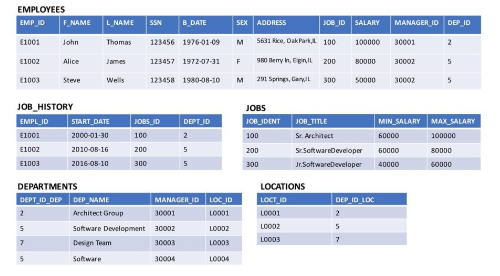

## Task:

1. Create a Sqlite database instance, named "HR_database", and connect to it. Read the tables as pandas dataframes and insert the tables in the database
2. Select the names and job start dates of all employees who work for the department number 5
3. Select the names, job start dates, and job titles of all employees who work for the department number 7
4. Remove the last row of DEPARTMENTS table with LOC_ID = L0004, and then perform a Left Outer Join on the EMPLOYEES and DEPARTMENT tables (select employee id, first name, last name, department id and department name for all employees)
5. Perform a Full Join on the EMPLOYEES and DEPARTMENT tables and select the First name, Last name and Department name of male employees.

In [1]:
# !pip install ipython-sql
# !pip install pandas

In [23]:
import pandas as pd
import sqlite3
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


1. Create a Sqlite database instance, named "HR_database", and connect to it. Read the tables as pandas dataframes and insert the tables in te database


In [3]:
# Creating a Sqlite database instance, named "HR_view", and connecting to it.
%sql sqlite:///HR_database.db
con = sqlite3.connect('HR_database.db')


In [4]:
# reading the tables as dataframes
Employees = pd.read_csv('Employees.csv')
JobsHistory = pd.read_csv('JobsHistory.csv')
Jobs = pd.read_csv('Jobs.csv')
Departments = pd.read_csv('Departments.csv')
Locations = pd.read_csv('Locations.csv')

In [5]:
# Insert the DataFrame into the database. This will automatically create the tables.
Employees.to_sql('EMPLOYEES', con, if_exists='replace', index=False, method='multi')
JobsHistory.to_sql('JOB_HISTORY', con, if_exists='replace', index=False, method='multi')
Jobs.to_sql('JOBS', con, if_exists='replace', index=False, method='multi')
Departments.to_sql('DEPARTMENTS', con, if_exists='replace', index=False, method='multi')
Locations.to_sql('LOCATIONS', con, if_exists='replace', index=False, method='multi')

con.close()

In [33]:
%sql SELECT * FROM EMPLOYEES;

 * sqlite:///HR_database.db
Done.


EMP_ID,F_NAME,L_NAME,SSN,B_DATE,SEX,ADDRESS,JOB_ID,SALARY,MANAGER_ID,DEP_ID
E1001,John,Thomas,123456,01/09/1976,M,"5631 Rice, OakPark,IL",100,100000,30001,2
E1002,Alice,James,123457,31/07/1972,F,"980 Berry ln, Elgin,IL",200,80000,30002,5
E1003,Steve,Wells,123458,08/10/1980,M,"291 Springs, Gary,IL",300,50000,30002,5
E1004,Santosh,Kumar,123459,20/07/1985,M,"511 Aurora Av, Aurora,IL",400,60000,30002,5
E1005,Ahmed,Hussain,123410,01/04/1981,M,"216 Oak Tree, Geneva,IL",500,70000,30001,2
E1006,Nancy,Allen,123411,02/06/1978,F,"111 Green Pl, Elgin,IL",600,90000,30001,2
E1007,Mary,Thomas,123412,05/05/1975,F,"100 Rose Pl, Gary,IL",650,65000,30003,7
E1008,Bharath,Gupta,123413,05/06/1985,M,"145 Berry Ln, Naperville,IL",660,65000,30003,7
E1009,Andrea,Jones,123414,07/09/1990,F,"120 Fall Creek, Gary,IL",234,70000,30003,7
E1010,Ann,Jacob,123415,30/03/1982,F,"111 Britany Springs,Elgin,IL",220,70000,30002,5


In [34]:
%sql SELECT * FROM DEPARTMENTS;

 * sqlite:///HR_database.db
Done.


DEPT_ID_DEP,DEP_NAME,MANAGER_ID,LOC_ID
2,Architect Group,30001,L0001
5,Software Group,30002,L0002
7,Design Team,30003,L0003


2. Select the names and job start dates of all employees who work for the department number 5

In [35]:
%%sql

SELECT E.F_NAME, E.L_NAME, J.START_DATE FROM EMPLOYEES E
INNER JOIN JOB_HISTORY J
ON E.EMP_ID = J.EMPL_ID
WHERE J.DEPT_ID = 5;

 * sqlite:///HR_database.db
Done.


F_NAME,L_NAME,START_DATE
Alice,James,01/08/2001
Steve,Wells,16/08/2001
Santosh,Kumar,16/08/2000
Ann,Jacob,16/08/2016


3. Select the names, job start dates, and job titles of all employees who work for the department number 7.

In [37]:
%%sql

SELECT E.F_NAME, E.L_NAME, JH.START_DATE, JO.JOB_TITLE FROM EMPLOYEES E
INNER JOIN JOB_HISTORY JH ON E.EMP_ID = JH.EMPL_ID
INNER JOIN JOBS JO ON E.JOB_ID = JO.JOB_IDENT
WHERE JH.DEPT_ID = '7';

 * sqlite:///HR_database.db
Done.


F_NAME,L_NAME,START_DATE,JOB_TITLE
Mary,Thomas,30/05/2002,Jr. Designer
Bharath,Gupta,06/05/2010,Jr. Designer
Andrea,Jones,16/08/2016,Sr. Designer


4. Remove the last row of DEPARTMENTS table with LOC_ID = L0004, and then perform a Left Outer Join on the EMPLOYEES and DEPARTMENT tables (select employee id, first name, last name, department id and department name for all employees)

In [38]:
%%sql

DELETE FROM DEPARTMENTS
WHERE LOC_ID = 'L0004';

 * sqlite:///HR_database.db
0 rows affected.


[]

In [39]:
%%sql

SELECT E.EMP_ID, E.F_NAME, E.L_NAME, D.DEPT_ID_DEP, D.DEP_NAME FROM EMPLOYEES E
LEFT JOIN DEPARTMENTS D ON E.DEP_ID = D.DEPT_ID_DEP;

 * sqlite:///HR_database.db
Done.


EMP_ID,F_NAME,L_NAME,DEPT_ID_DEP,DEP_NAME
E1001,John,Thomas,2,Architect Group
E1002,Alice,James,5,Software Group
E1003,Steve,Wells,5,Software Group
E1004,Santosh,Kumar,5,Software Group
E1005,Ahmed,Hussain,2,Architect Group
E1006,Nancy,Allen,2,Architect Group
E1007,Mary,Thomas,7,Design Team
E1008,Bharath,Gupta,7,Design Team
E1009,Andrea,Jones,7,Design Team
E1010,Ann,Jacob,5,Software Group


5. Perform a Full Join on the EMPLOYEES and DEPARTMENT tables and select the First name, Last name and Department name of male employees

In [40]:
%%sql

SELECT E.F_NAME, E.L_NAME, D.DEP_NAME FROM EMPLOYEES E
FULL JOIN DEPARTMENTS D ON E.DEP_ID = D.DEPT_ID_DEP
where E.SEX = 'M';

 * sqlite:///HR_database.db
Done.


F_NAME,L_NAME,DEP_NAME
John,Thomas,Architect Group
Steve,Wells,Software Group
Santosh,Kumar,Software Group
Ahmed,Hussain,Architect Group
Bharath,Gupta,Design Team
